In [1]:
from data import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 7)

In [3]:
daily_rain = daily_rainfall()
recent_rain = recent_rainfall()
auto_rain = load_daily()
manual_rain = load('climate_extract_cgi')
hourly_rain = daily_from_hourly(load_hourly(), ['Rain'])

In [4]:
manual_rain['RR'].tail()

timestamp
2023-04-05 09:00:00    0.0
2023-04-06 09:00:00    3.1
2023-04-07 09:00:00    0.5
2023-04-08 09:00:00    0.0
2023-04-09 09:00:00    0.0
Name: RR, dtype: float64

In [4]:
auto_rain['Rain_accum_0909'].tail()

timestamp
2021-09-30 09:00:00     0.8
2021-10-01 09:00:00     2.6
2021-10-02 09:00:00     0.2
2021-10-03 09:00:00    16.6
2021-10-04 09:00:00     4.2
Name: Rain_accum_0909, dtype: float64

In [5]:
recent_rain

timestamp
2021-10-05 09:00:00    8.4
Freq: D, Name: Rain, dtype: float64

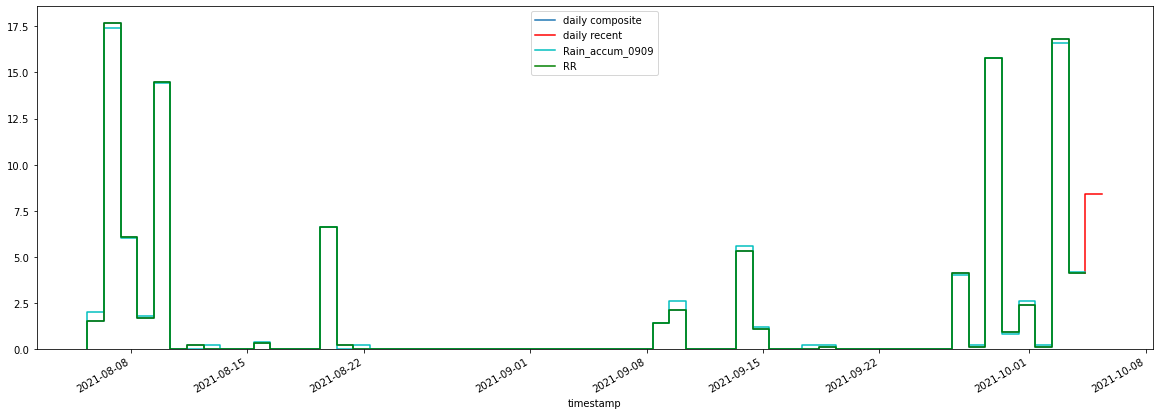

In [6]:
s = slice(daily_rain.index.max()-pd.Timedelta(days=60), None)
ax = daily_rain[s].plot(drawstyle='steps', label='daily composite', ylim=(0,None))
pd.concat([daily_rain.iloc[-1:], recent_rain]).plot(ax=ax, drawstyle='steps', label='daily recent',color='r')
auto_rain[s]['Rain_accum_0909'].plot(ax=ax, drawstyle='steps', color='c')
manual_rain[s]['RR'].plot(ax=ax, drawstyle='steps', color='g')
ax.legend()

<AxesSubplot:xlabel='timestamp'>

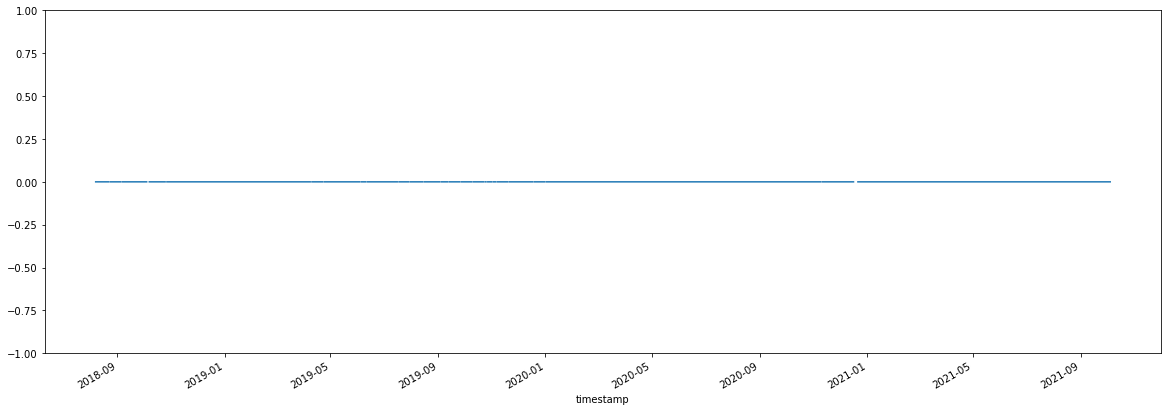

In [7]:
diff = (auto_rain['Rain_accum_0909']-hourly_rain['Rain'])
diff.plot(ylim=(-1, 1))

<AxesSubplot:xlabel='timestamp'>

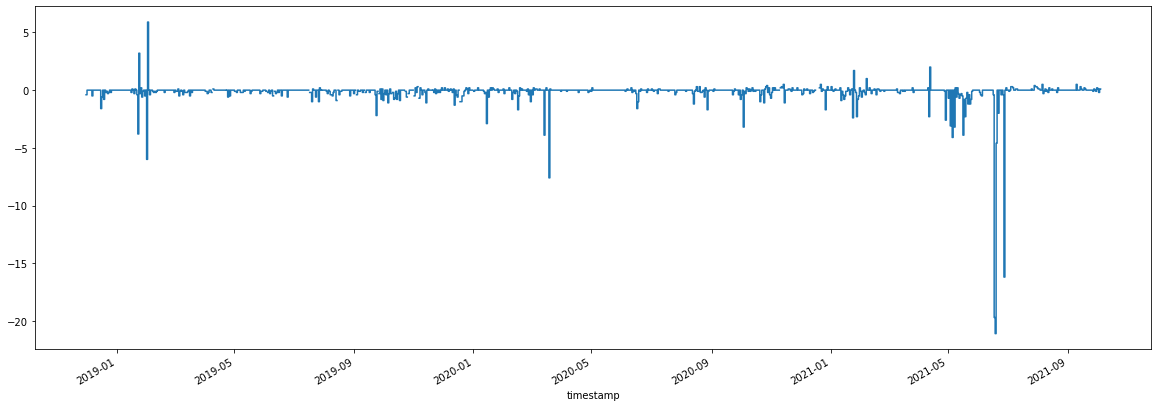

In [8]:
diff = (auto_rain['Rain_accum_0909']-manual_rain['RR'])
diff.plot(drawstyle='steps')

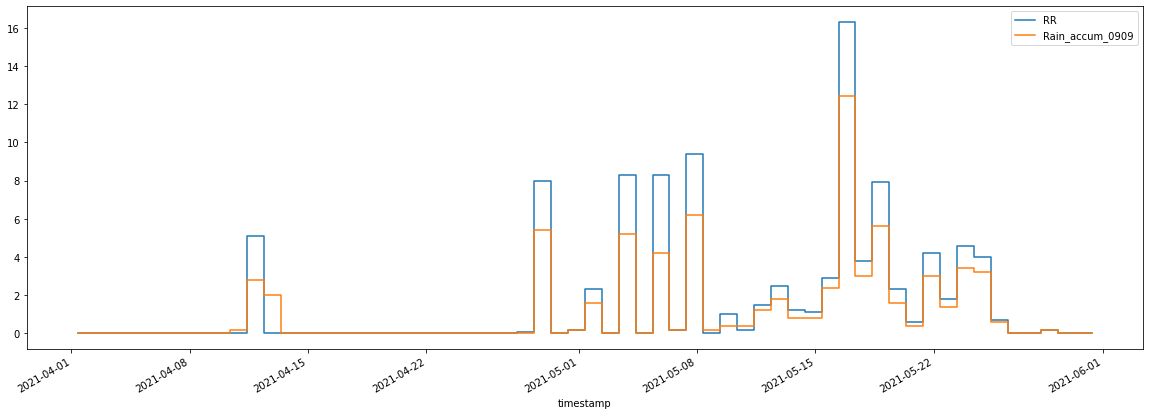

In [5]:
s = slice('2021-04', '2021-05')
manual_rain['RR'][s].plot(drawstyle='steps')
ax = auto_rain['Rain_accum_0909'].loc[manual_rain['RR'].index.min():][s].plot(drawstyle='steps')
ax.legend()

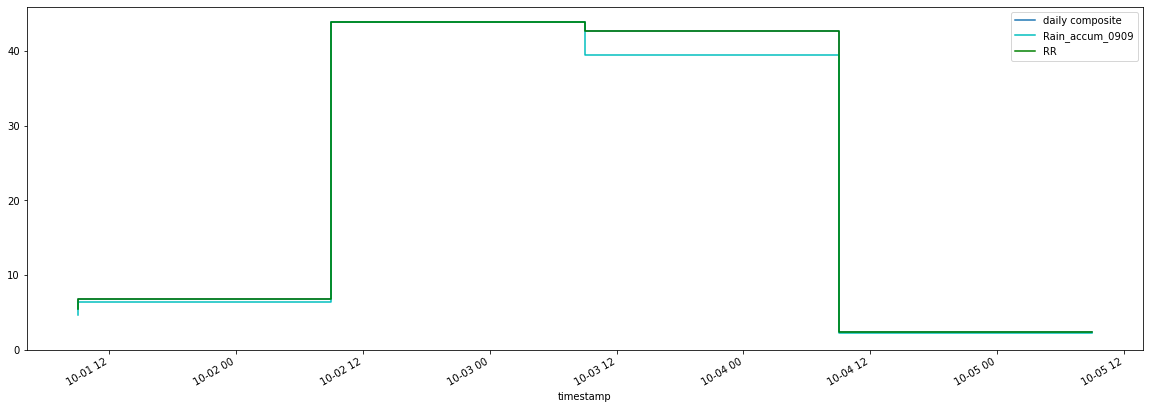

In [9]:
s = slice('2020-10-01', '2020-10-05')
ax = daily_rain[s].plot(drawstyle='steps', label='daily composite', ylim=(0,None))
auto_rain[s]['Rain_accum_0909'].plot(ax=ax, drawstyle='steps', color='c')
manual_rain[s]['RR'].plot(ax=ax, drawstyle='steps', color='g')
ax.legend()

In [11]:
hourly_rain = load_hourly(variables=['Rain'])

<AxesSubplot:xlabel='timestamp'>

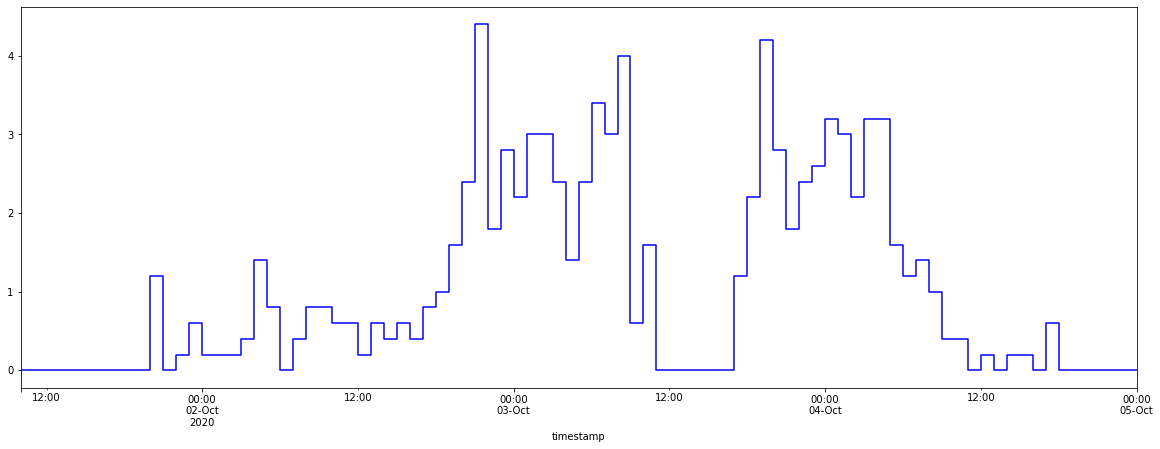

In [20]:
hourly_rain['2020-10-01 10:00':'2020-10-05 00:00']['Rain'].plot(drawstyle='steps', label='Hourly Rainfall (mm)', color='blue')

<AxesSubplot:xlabel='timestamp'>

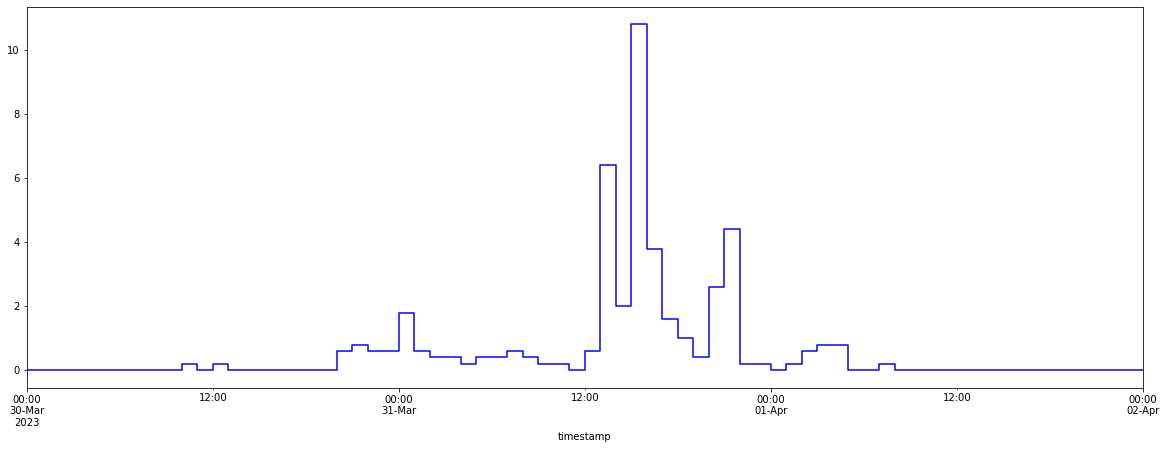

In [15]:
hourly_rain['2023-03-30':'2023-04-02 00:00']['Rain'].plot(drawstyle='steps', label='Hourly Rainfall (mm)', color='blue')